In [1]:
#extracting lines for simplied verion
open('wat.txt','w').writelines([ line for line in open("wat-out.log") if "Enqueue" in line])
print ("done")

done


In [2]:
#extracting content from lines
csv_out = open('wat_csv.txt','w')
with open ('wat.txt', 'rt') as fft:
    csv_out.write("time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time\n")
    for line in fft:
        line_split = line.split()
        time = line_split[line_split.index("time:") + 1]
        router = line_split[line_split.index("SwitchAllocator") + 3]
        outport = line_split[line_split.index("outport") + 1]
        inport = line_split[line_split.index("inport") + 1]
        packet_address = line_split[line_split.index("addr") + 2][1:-1]
        packet_type = line_split[line_split.index("addr") + 7]
        flit_id = line_split[line_split.index("[flit::") + 1][3:]
        flit_type = line_split[line_split.index("Id="+str(flit_id)) + 1][5:]
        vnet = line_split[line_split.index("Type="+str(flit_type)) + 1][5:]
        vc = line_split[line_split.index("Vnet="+str(vnet)) + 1][3:]
        src_ni = line_split[line_split.index("VC="+str(vc)) + 2][3:]
        src_router = line_split[line_split.index("NI="+str(src_ni)) + 2][7:]
        dst_ni = line_split[line_split.index("Router="+str(src_router)) + 2][3:]
        dst_router = line_split[line_split.index("NI="+str(dst_ni)) + 2][7:]
        enq_time = str(line_split[line_split.index("Enqueue") + 1][5:])
        line_csv = time+","+router+","+outport+","+inport+","+packet_address+","+packet_type+","+flit_id+","+flit_type+","+vnet+","+vc+","+src_ni+","+src_router+","+dst_ni+","+dst_router+","+enq_time+"\n"
        csv_out.write(line_csv)
print ("done")

done


In [3]:
#convert txt to csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("wat_csv.txt",delimiter=',')
df.to_csv('wat.csv',index=False)

In [4]:
#dataset
df = pd.read_csv('wat.csv')

print(df.head())

   time  router outport inport packet_address packet_type  flit_id  flit_type  \
0     7       0    East  Local         0x1dc0        GETX        0          3   
1    11       1    East   West         0x1dc0        GETX        0          3   
2    15       2    East   West         0x1dc0        GETX        0          3   
3    19       3   North   West         0x1dc0        GETX        0          3   
4    23       7   Local  South         0x1dc0        GETX        0          3   

   vnet  vc  src_ni  src_router  dst_ni  dst_router  enq_time  
0     2   8       0           0      23           7         3  
1     2   8       0           0      23           7         3  
2     2   8       0           0      23           7         3  
3     2   8       0           0      23           7         3  
4     2   8       0           0      23           7         3  


In [5]:
df.dtypes

time               int64
router             int64
outport           object
inport            object
packet_address    object
packet_type       object
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

In [6]:
df.shape

(245667, 15)

In [7]:
df.describe()

,time,router,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,2.456670e+05,245667.000000,245667.000000,245667.000000,245667.000000,245667.000000,245667.000000,245667.000000,245667.000000,245667.000000,2.456670e+05
mean,1.733270e+06,4.370078,1.666634,1.333337,2.935384,12.145396,12.564329,4.431238,12.147452,4.280542,1.733249e+06
std,1.059286e+06,4.384709,1.490710,0.942820,0.956335,3.887439,12.775780,5.432993,12.757847,5.399236,1.059286e+06
min,7.000000e+00,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,7.220315e+05,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,7.220200e+05
50%,1.803037e+06,3.000000,1.000000,1.000000,3.000000,12.000000,17.000000,1.000000,0.000000,0.000000,1.802997e+06
75%,2.705528e+06,8.000000,3.000000,2.000000,4.000000,16.000000,26.000000,10.000000,25.000000,9.000000,2.705516e+06
max,3.152969e+06,15.000000,4.000000,3.000000,4.000000,19.000000,31.000000,15.000000,31.000000,15.000000,3.152948e+06


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

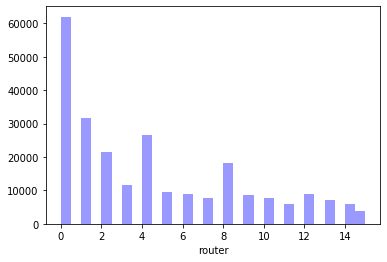

In [9]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

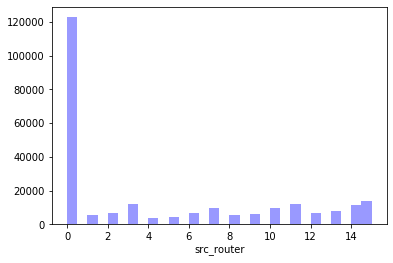

In [10]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

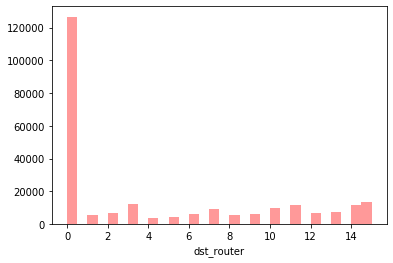

In [11]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

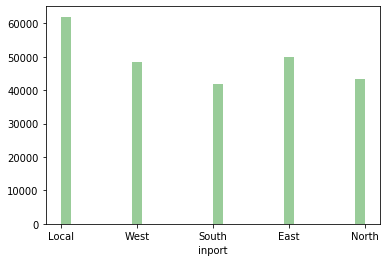

In [12]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

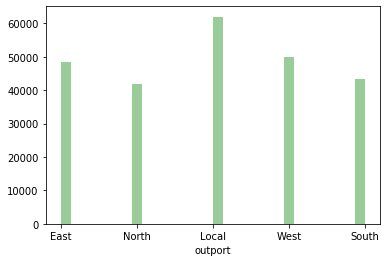

In [13]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

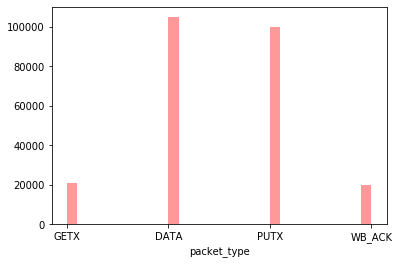

In [14]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')

In [15]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [18]:
data = {'GETX': 0,'DATA': 1, 'PUTX': 2, 'WB_ACK':3}
df = df.replace({'packet_type': data})

In [19]:
df.dtypes

time               int64
router             int64
outport            int64
inport             int64
packet_address    object
packet_type        int64
flit_id            int64
flit_type          int64
vnet               int64
vc                 int64
src_ni             int64
src_router         int64
dst_ni             int64
dst_router         int64
enq_time           int64
dtype: object

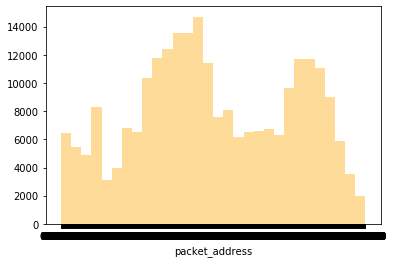

In [20]:
sns.distplot(df['packet_address'], kde = False, bins=30, color='orange')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
dff = pd.DataFrame(df['packet_address'], columns=['packet_address'])

In [23]:
le = LabelEncoder()
encode = dff[dff.columns[:]].apply(le.fit_transform)

In [24]:
df['packet_address_id'] = encode

In [25]:
df.isnull().sum()

time                 0
router               0
outport              0
inport               0
packet_address       0
packet_type          0
flit_id              0
flit_type            0
vnet                 0
vc                   0
src_ni               0
src_router           0
dst_ni               0
dst_router           0
enq_time             0
packet_address_id    0
dtype: int64

In [26]:
df.corr()

,time,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id
time,1.000000,0.035266,-0.020097,0.007382,0.035268,-0.000024,0.000007,-0.031681,-0.034457,-0.012543,0.010155,0.040331,0.055400,1.000000,-0.264732
router,0.035266,1.000000,0.309745,0.045306,-0.041329,0.001794,-0.002845,0.179360,0.169678,0.296830,0.423750,-0.111184,0.013247,0.035266,-0.042905
outport,-0.020097,0.309745,1.000000,-0.360800,-0.110480,0.004747,-0.007528,0.488725,0.521815,0.515007,0.462988,-0.490690,-0.406714,-0.020091,0.016645
inport,0.007382,0.045306,-0.360800,1.000000,0.111857,-0.004779,0.007565,-0.492688,-0.580966,-0.494013,-0.407702,0.518756,0.467074,0.007376,0.002242
packet_type,0.035268,-0.041329,-0.110480,0.111857,1.000000,0.006117,-0.009652,-0.396591,-0.432577,-0.211019,-0.175377,0.210720,0.175065,0.035269,-0.018346
flit_id,-0.000024,0.001794,0.004747,-0.004779,0.006117,1.000000,0.079042,0.104713,0.080531,0.009117,0.007747,-0.009134,-0.007805,-0.000027,-0.000014
flit_type,0.000007,-0.002845,-0.007528,0.007565,-0.009652,0.079042,1.000000,-0.165597,-0.127359,-0.014450,-0.012286,0.014471,0.012364,0.000003,0.000003
vnet,-0.031681,0.179360,0.488725,-0.492688,-0.396591,0.104713,-0.165597,1.000000,0.977442,0.930524,0.771871,-0.931300,-0.775440,-0.031675,0.016467
vc,-0.034457,0.169678,0.521815,-0.580966,-0.432577,0.080531,-0.127359,0.977442,1.000000,0.902749,0.739257,-0.914178,-0.767886,-0.034450,0.018850
src_ni,-0.012543,0.296830,0.515007,-0.494013,-0.211019,0.009117,-0.014450,0.930524,0.902749,1.000000,0.927489,-0.936400,-0.779687,-0.012537,-0.001776


In [27]:
df.dtypes

time                  int64
router                int64
outport               int64
inport                int64
packet_address       object
packet_type           int64
flit_id               int64
flit_type             int64
vnet                  int64
vc                    int64
src_ni                int64
src_router            int64
dst_ni                int64
dst_router            int64
enq_time              int64
packet_address_id     int32
dtype: object

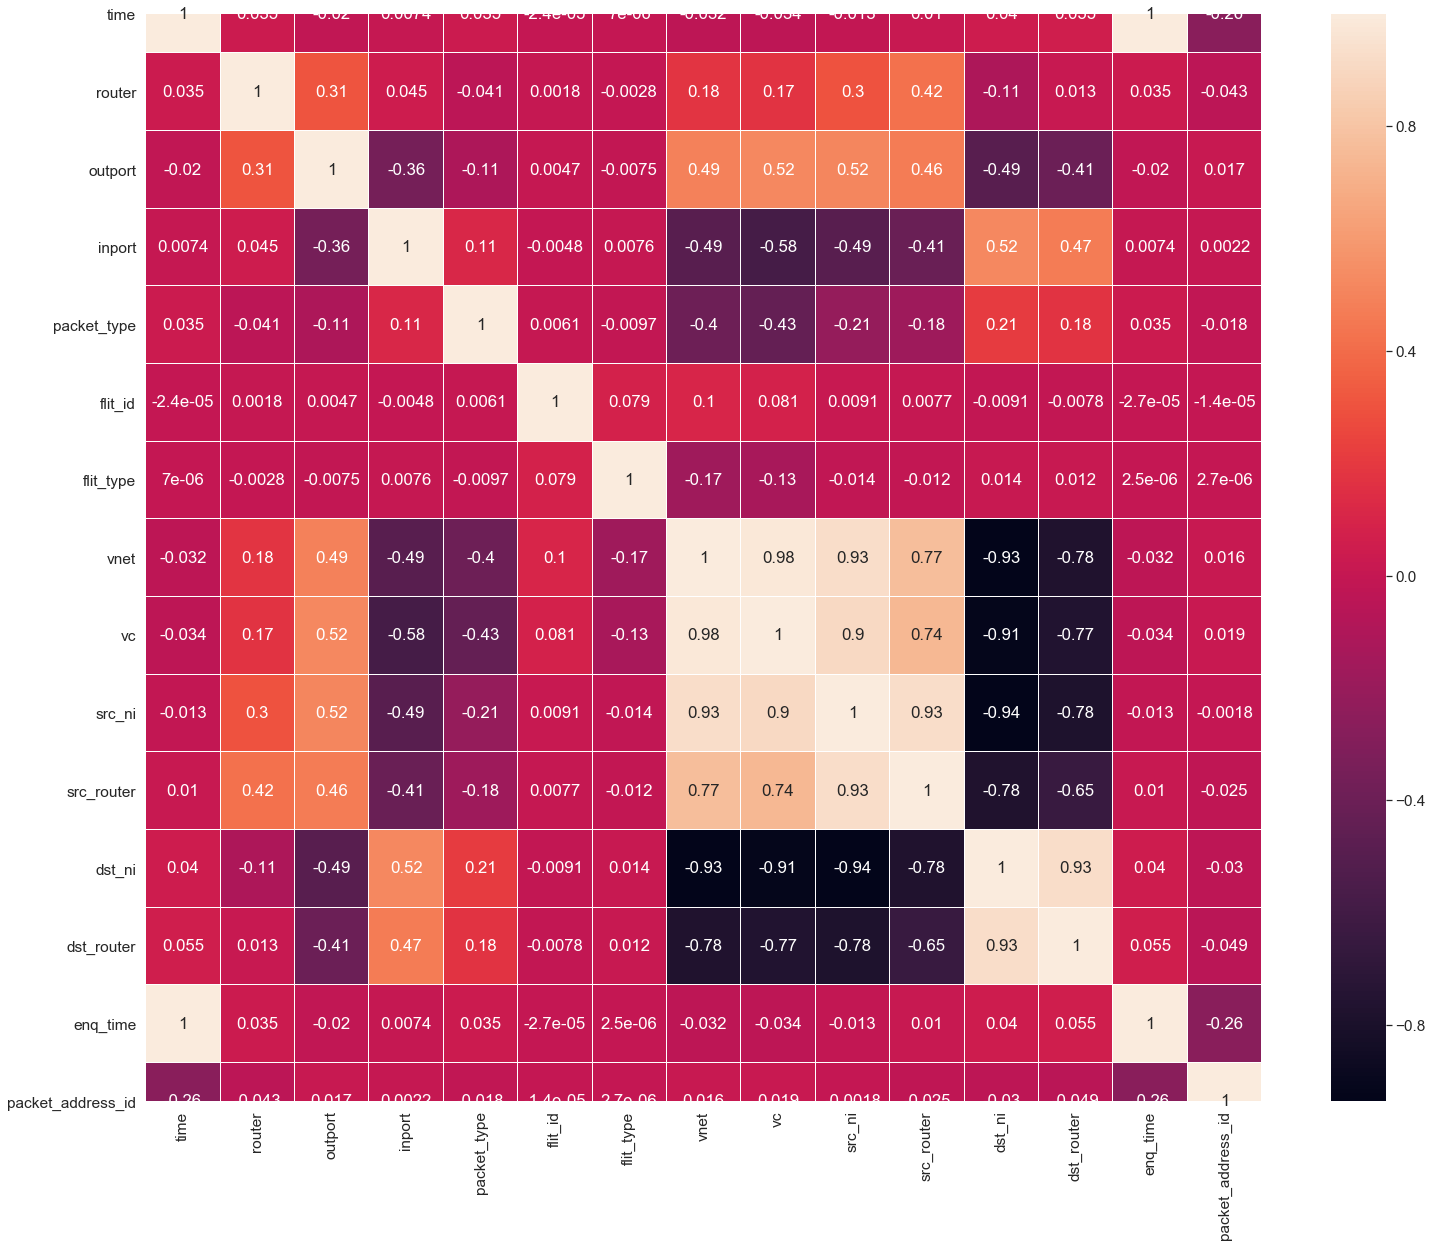

In [28]:
plt.figure(figsize=(25,20))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [29]:
df_v2 = df[:]

In [30]:
df_v2.to_csv('wat_v2.csv',index=False)

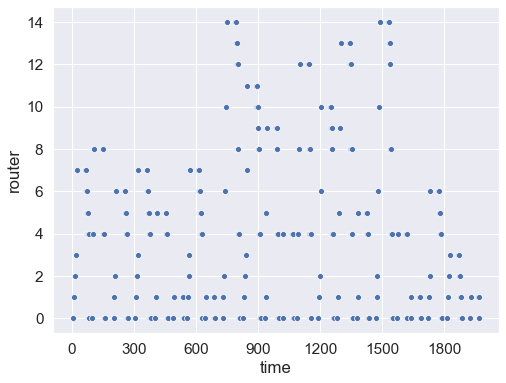

In [31]:
import numpy as np
dff_500 = pd.read_csv('wat_v2.csv',nrows=500)
plt.figure(figsize=(8,6))
sns.scatterplot(x='time',y='router',data=dff_500)
plt.xticks(np.arange(0, 1970, 300))
plt.show()

In [32]:
dff_500['router'].value_counts()

0     129
4      89
8      42
1      42
5      39
6      30
12     21
7      19
9      17
13     16
2      15
10     13
14     12
3      10
11      6
Name: router, dtype: int64

In [33]:
df = pd.read_csv('wat_v2.csv')

In [34]:
df['target']='good'

In [35]:
df.head()

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,good
1,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,good
2,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,good
3,19,3,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,good
4,23,7,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,good


In [37]:
df.to_csv('wat_good.csv',index=False)